In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import stats
import math
import copy
import pandas as pd
from scipy.stats import chi2_contingency

In [277]:
# 1 - ANALYSE DE QI

X1 = np.random.normal(100, 15, 10)
X2 = np.random.normal(100, 15, 1000)
X3 = np.random.normal(100, 15, 100000)

print("\033[1m Moyenne de QI échantillon taille 10: \033[0m", np.average(X1))
print("\033[1m Écart-type: \033[0m", np.std(X1))
print("\033[1m Erreur type: \033[0m", stats.sem(X1))
print("\033[1m Intervalle de confiance: \033[0m", np.average(X1)-2*np.std(X1)/math.sqrt(10), np.average(X1)+2*np.std(X1)/math.sqrt(10), "\n")


print("\033[1m Moyenne de QI échantillon taille 1000: \033[0m", np.average(X2))
print("\033[1m Écart-type: \033[0m", np.std(X2))
print("\033[1m Erreur type: \033[0m", stats.sem(X2))
print("\033[1m Intervalle de confiance: \033[0m", np.average(X2)-2*np.std(X2)/math.sqrt(1000), np.average(X2)+2*np.std(X2)/math.sqrt(1000), "\n")



print("\033[1m Moyenne de QI échantillon taille 100000: \033[0m", np.average(X3))
print("\033[1m Écart-type: \033[0m", np.std(X3))
print("\033[1m Erreur type: \033[0m", stats.sem(X3))
print("\033[1m Intervalle de confiance: \033[0m", np.average(X3)-2*np.std(X3)/math.sqrt(10000), np.average(X3)+2*np.std(X3)/math.sqrt(10000), "\n")


# Plus l'échantillon est grand, plus la moyenne et l'écart-type se rapprochent des valeurs théoriques.
# L'erreur type regresse de presque dix fois entre chaque echantillon, donc plus la taille de l'echantillon 
# est grande, plus l'erreur est petite. L'intervalle de confiance est également plus précis plus l'échantillon
# est grand. En général donc plus l'échantillon est grand, plus il est représentatif.


c = []
with open('malnutrition.csv', newline='') as csvfile:
    
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        c.append(row[0])


data = np.empty(len(c), dtype = int)
for i in range (0, len(c)):
    data[i] = int(c[i])
    
print("\033[1m Moyenne de QI des personnes malnouries: \033[0m", np.average(data))
print("\033[1m Écart-type: \033[0m", np.std(data))
print("\033[1m Intervalle de confiance: \033[0m", np.average(data)-2*np.std(data)/math.sqrt(len(data)), np.average(data)+2*np.std(data)/math.sqrt(len(data)), "\n")


# On constate que la moyenne de QI des personnes malnouries est toujours inférieure à la moyenne. 
# C'est aussi le cas pour l'écart-type et l'intervalle de confiance. On peut en déduire que la
# malnutrition est effectivement une cause de sous-développement de l'intellecte.

 Moyenne de QI échantillon taille 10:  98.85083739584132
 Écart-type:  15.161288694781456
 Erreur type:  5.0537628982604845
 Intervalle de confiance:  89.26199648806717 108.43967830361548 

 Moyenne de QI échantillon taille 1000:  100.39920419897608
 Écart-type:  14.554089039845007
 Erreur type:  0.4604709994354233
 Intervalle de confiance:  99.47872278628002 101.31968561167214 

 Moyenne de QI échantillon taille 100000:  100.0349446032699
 Écart-type:  15.011580565752043
 Erreur type:  0.047471023222604984
 Intervalle de confiance:  99.73471299195486 100.33517621458495 

 Moyenne de QI des personnes malnouries:  87.98
 Écart-type:  9.629101723421556
 Intervalle de confiance:  86.05417965531569 89.90582034468432 



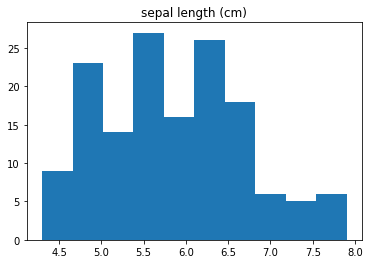

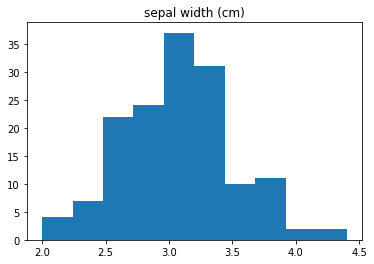

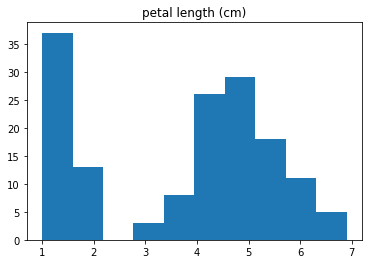

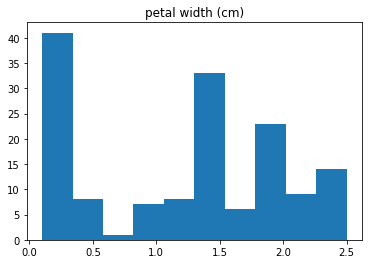

 Noms des variables - correlation avec notre fonction - correlation avec la fonction numpy  

sepal length - sepal width:  -0.11756978413300198 -0.11756978413300201 

sepal length - petal length:  0.8717537758865834 0.8717537758865833 

sepal length - petal width:  0.8179411262715753 0.8179411262715758 

sepal width - petal length:  -0.4284401043305397 -0.4284401043305397 

sepal length - petal width:  -0.36612593253643927 -0.36612593253643916 

petal length - petal width:  0.9628654314027963 0.9628654314027962 



 Intervalle de confiance:  -0.20239218493317662 0.782533689120168 



In [278]:
# 2 - Données multivariées

# Je me suis permise de charger les données directement à partir de la librairie datasets afin de gagner du temps,
# vous pouvez juger de ma capacité à traiter les fichiers csv dans la première et la dernière parties de ce TP.

iris = datasets.load_iris()
X = iris.data
Y = iris.target

plt.hist(X.T[0])
plt.title(iris.feature_names[0])
plt.show()

plt.hist(X.T[1])
plt.title(iris.feature_names[1])
plt.show()

plt.hist(X.T[2])
plt.title(iris.feature_names[2])
plt.show()

plt.hist(X.T[3])
plt.title(iris.feature_names[3])
plt.show()

# En observant les histogrammes obtenus, nous pouvouns supposer que l'on peut séparer les données en trois classes.
# Nous observons également un lien entre les variables petal lentgth et petal width: mêmes s'ils ne sont pas 
# totalement identiques, leurs histogrammes suivent à peu près le même dessin.

def coef_correl(A, B):
    
    l = A.shape[0]
    
    covariance = sum((A-np.mean(A))  * (B-np.mean(B))) / (l-1)
    res = covariance / math.sqrt((np.std(A, ddof=1)**2) * (np.std(B, ddof=1))**2)
    
    return res

print("\033[1m Noms des variables - correlation avec notre fonction - correlation avec la fonction numpy \033[0m \n")
print("sepal length - sepal width: ", coef_correl(X[:,0], X[:,1]), np.corrcoef(X[:,0], X[:,1])[0][1], "\n")
print("sepal length - petal length: ", coef_correl(X[:,0], X[:,2]), np.corrcoef(X[:,0], X[:,2])[0][1], "\n")
print("sepal length - petal width: ", coef_correl(X[:,0], X[:,3]), np.corrcoef(X[:,0], X[:,3])[0][1], "\n")
print("sepal width - petal length: ", coef_correl(X[:,1], X[:,2]), np.corrcoef(X[:,1], X[:,2])[0][1], "\n")
print("sepal length - petal width: ", coef_correl(X[:,1], X[:,3]), np.corrcoef(X[:,1], X[:,3])[0][1], "\n")
print("petal length - petal width: ", coef_correl(X[:,2], X[:,3]), np.corrcoef(X[:,2], X[:,3])[0][1], "\n\n\n")

# Après avoir calculé les coefficients de corrélation, l'hypothèse sur la dépendance entre petal length et 
# petal width est démontrée: on trouve un coefficient de 0,96. 
# Mais on trouve également deux autre couples de variables qui ont une grande chance d'être dépendants:
# sepal length - petal length avec un coef de 0,87 et sepal length - petal width avec un coef de 0,82

coefs = [coef_correl(X[:,0], X[:,1]), coef_correl(X[:,0], X[:,2]), coef_correl(X[:,0], X[:,3]),coef_correl(X[:,1], X[:,2]),coef_correl(X[:,1], X[:,3]), coef_correl(X[:,2], X[:,3])]
print("\033[1m Intervalle de confiance: \033[0m", np.average(coefs)-2*np.std(coefs)/math.sqrt(len(coefs)), np.average(coefs)+2*np.std(coefs)/math.sqrt(len(coefs)), "\n")

# L'intervalle de confiance est large et désigne une majorité de variables indépendantes. 


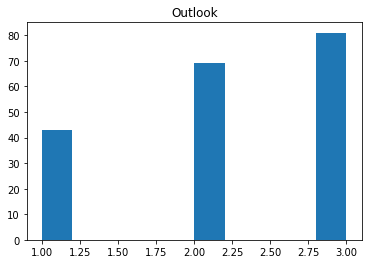

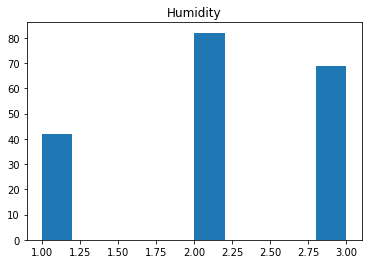

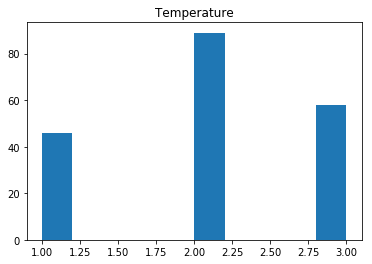

 Tableau de contingence entre Outlook et Temperature:

  col_0   1   2   3
row_0            
1      10  19  14
2      19  36  14
3      17  34  30 

 Tableau de contingence entre Outlook et Humidity:

  col_0   1   2   3
row_0            
1       0  13  30
2       5  34  30
3      37  35   9 

 Tableau de contingence entre Humidity et Temperature:

  col_0   1   2   3
row_0            
1       4  19  19
2      20  38  24
3      22  32  15 



 Test X2 pour Outlook et Temperature:

  (5.156231372327428, 0.2716395245680652, 4, array([[10.24870466, 19.82901554, 12.92227979],
       [16.44559585, 31.81865285, 20.7357513 ],
       [19.30569948, 37.35233161, 24.34196891]])) 

 Test X2 pour Outlook et Humidity:

  (68.43334232432757, 4.860006244554568e-14, 4, array([[ 9.35751295, 18.26943005, 15.37305699],
       [15.01554404, 29.31606218, 24.66839378],
       [17.62694301, 34.41450777, 28.95854922]])) 

 Test X2 pour Humidity et Temperature:

  (10.330736992441599, 0.03521016044258168, 4, ar

In [279]:
# 3 - Test d’indépendance et variables catégorielles

c0 = []
c1 = []
c2 = []
c3 = []

with open('weather.csv', newline='') as csvfile:
    
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        c0.append(row[0])
        c1.append(row[1])
        c2.append(row[2])
        c3.append(row[3])
        
c0.pop(0)
c1.pop(0)
c2.pop(0)
c3.pop(0)

outlook = np.ones(len(c1), dtype=int)
humidity = np.ones(len(c2), dtype=int)
temperature = np.ones(len(c3), dtype=int)

for i in range (0, len(c2)):
    if c1[i] == "Overcast":
        outlook[i] = 2
    elif c1[i] == "Sunny":
        outlook[i] = 3
    
    if c2[i] == "Average":
        humidity[i] = 2
    elif c2[i] == "High":
        humidity[i] = 3
    
    if c3[i] == "Mild":
        temperature[i] = 2
    elif c3[i] == "Hot":
        temperature[i] = 3
        
plt.hist(outlook)
plt.title("Outlook")
plt.show()

plt.hist(humidity)
plt.title("Humidity")
plt.show()

plt.hist(temperature)
plt.title("Temperature")
plt.show()

# J'ai remplaceé les variables explicatives par des entiers pour faciliter le traitement des données.
# Les trois histogrammes se ressemblent beaucoup: on se doute déjà d'une certaine dépendance entre les variables.


OT = pd.crosstab(outlook, temperature)
OH = pd.crosstab(outlook, humidity)
HT = pd.crosstab(humidity, temperature)

print("\033[1m Tableau de contingence entre Outlook et Temperature:\n\n \033[0m", OT, "\n")
print("\033[1m Tableau de contingence entre Outlook et Humidity:\n\n \033[0m", OH, "\n")
print("\033[1m Tableau de contingence entre Humidity et Temperature:\n\n \033[0m", HT, "\n\n\n")


# Détermination du nombre de degrés de liberté:  z = (k-1)*(p-1) = (3-1)*(3-1) = 4
# avec k et p les nombres de lignes et de colonnes du tableau de contingence


print("\033[1m Test X2 pour Outlook et Temperature:\n\n \033[0m", chi2_contingency(OT,correction=False), "\n")
print("\033[1m Test X2 pour Outlook et Humidity:\n\n \033[0m", chi2_contingency(OH,correction=False), "\n")
print("\033[1m Test X2 pour Humidity et Temperature:\n\n \033[0m", chi2_contingency(HT,correction=False), "\n")


# Lors des tests X2 nous pouvons voir que:

# - Pour les variables Outlook et Temerature, nous avons un chi2 de 5,1 et un p de 0,27.
#   Nous ne pouvons donc pas affirmer avec certitude que ces variables sont dépendantes.
#   Elles ont néanmoins 73% de chances de l'être.

# - Pour les variables Outlook et Humidity, nous avons un chi2 de 68,4 et un p très proche de zero.
#   Outlook et Temperature sont donc dépendantes avec une chance de plus de 99%

# - Pour les variables Humidity et Temerature, nous avons un chi2 de 10,3 et un p de 0,035.
#   Humidity et Temperature sont donc dépendantes avec une chance de 96,5%